TASK-4: Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

AUTHOR: MOULI KAYAL

INTERNSHIP DOMAIN: DATA SCIENCE

DURATION: 15 th October,2024 - 15th november, 2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
cols=['ID', 'Topic', 'Sentiment', 'Text']
data = pd.read_csv(r"/content/twitter_training.csv",names=cols)

In [5]:
data.head(10)

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [6]:
data.tail(10)

,ID,Topic,Sentiment,Text
74672,9199,Nvidia,Positive,Let no elite go unnoticed... NVIDIA Highlights...
74673,9199,Nvidia,Positive,Let no elim go unnoticed.... NVIDIA Highlights...
74674,9199,Nvidia,Positive,Let a no information elim that go unnoticed......
74675,9199,Nvidia,Positive,<unk> my elim be no.... NVIDIA Highlights Pict...
74676,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [7]:
data.shape

(74682, 4)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
data.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [10]:
data['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [11]:
data.isnull().sum()

,0
ID,0
Topic,0
Sentiment,0
Text,686


In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

,0
ID,0
Topic,0
Sentiment,0
Text,0


In [14]:
data.duplicated().sum()

2340

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().sum()

0

In [18]:
sentiment_counts=data['Sentiment'].value_counts()
sentiment_counts

,count
Sentiment,
Negative,21698
Positive,19713
Neutral,17708
Irrelevant,12537


VISUALIZATION OF COUNT OF DIFFERENT TOPICS

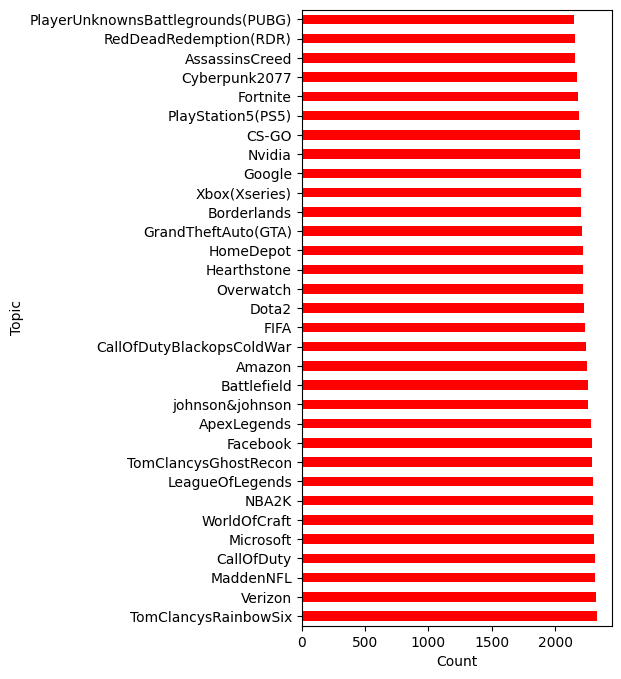

In [27]:
plt.figure(figsize=(4,8))
data['Topic'].value_counts().plot(kind='barh',color='r')
plt.xlabel("Count")
plt.show()

SENTIMENT DISTRIBUTION

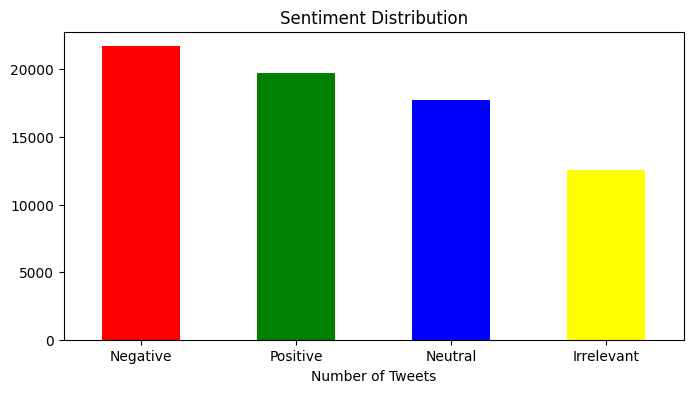

In [25]:
plt.figure(figsize=(8,4))
sentiment_counts.plot(kind='bar',color=['red','green','blue','yellow'])
plt.title('Sentiment Distribution')
plt.xlabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [29]:
brand_data=data[data['Topic'].str.contains('Microsoft',case=False)]
brand_sentiment_counts=brand_data['Sentiment'].value_counts()
brand_sentiment_counts

,count
Sentiment,
Neutral,816
Negative,748
Positive,573
Irrelevant,167


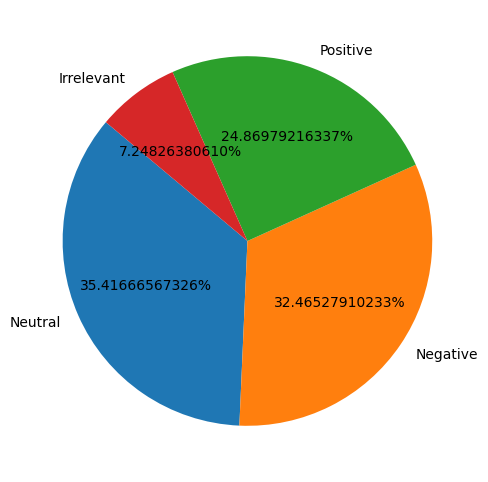

In [30]:
plt.figure(figsize=(6,6))
plt.pie(brand_sentiment_counts,labels=brand_sentiment_counts.index,autopct='%1.11f%%',startangle=140)
plt.show()

*OBSERVATION:-*

* MOST TOPIC HAS NEGATIVE SENTIMENT

In [31]:
data

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


SENTIMENT DISTRIBUTION TOPIC-WISE

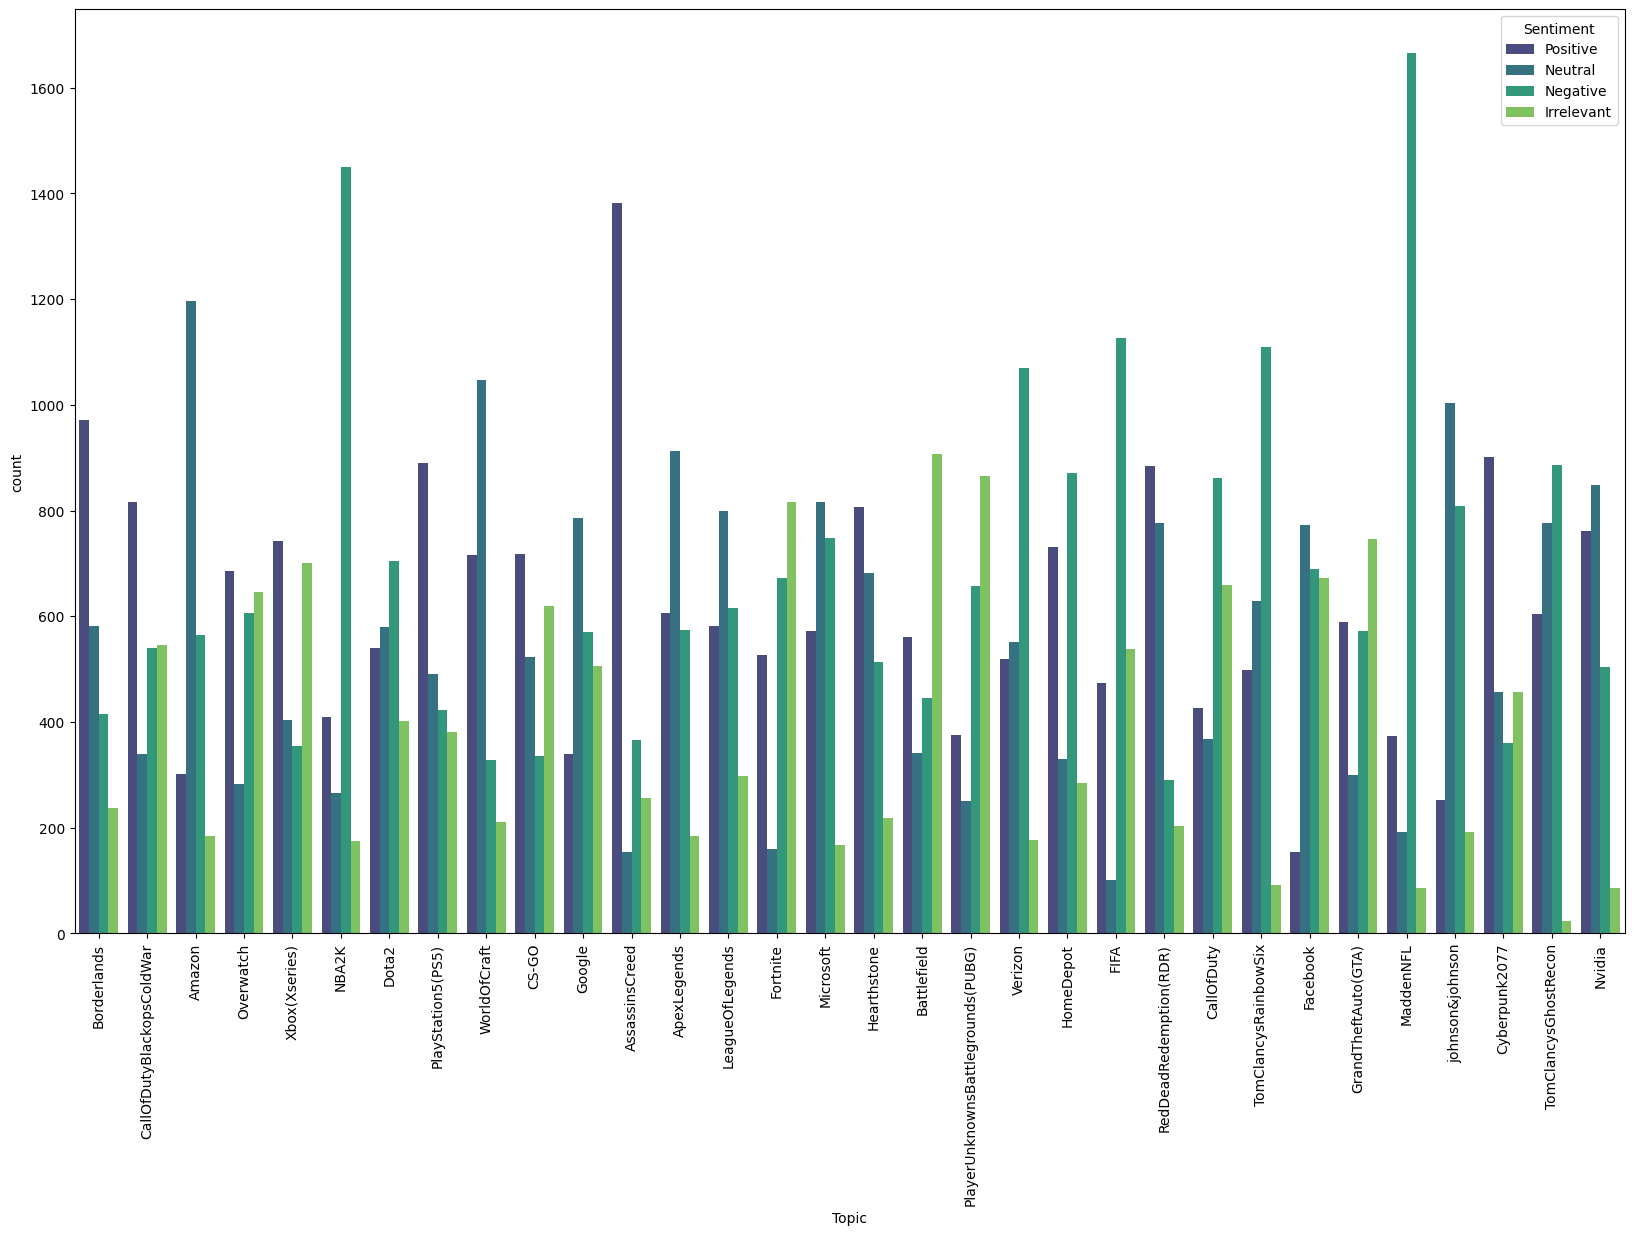

In [32]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=data,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [33]:
## Group by Topic and Sentiment
topic_wise_sentiment = data.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = data['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

TOP 5 TOPICS WITH NEGATIVE SENTIMENTS

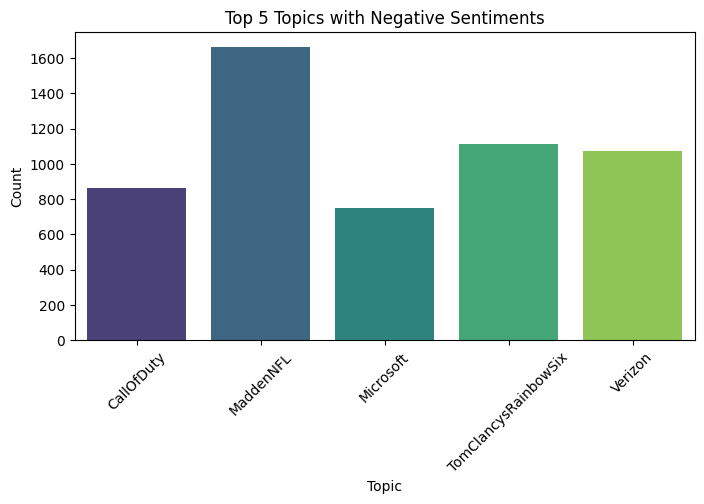

In [39]:
plt.figure(figsize=(8, 4))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', hue='Topic', palette='viridis', legend=False)

plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


TOP 5 TOPICS WITH POSITIVE SENTIMENTS

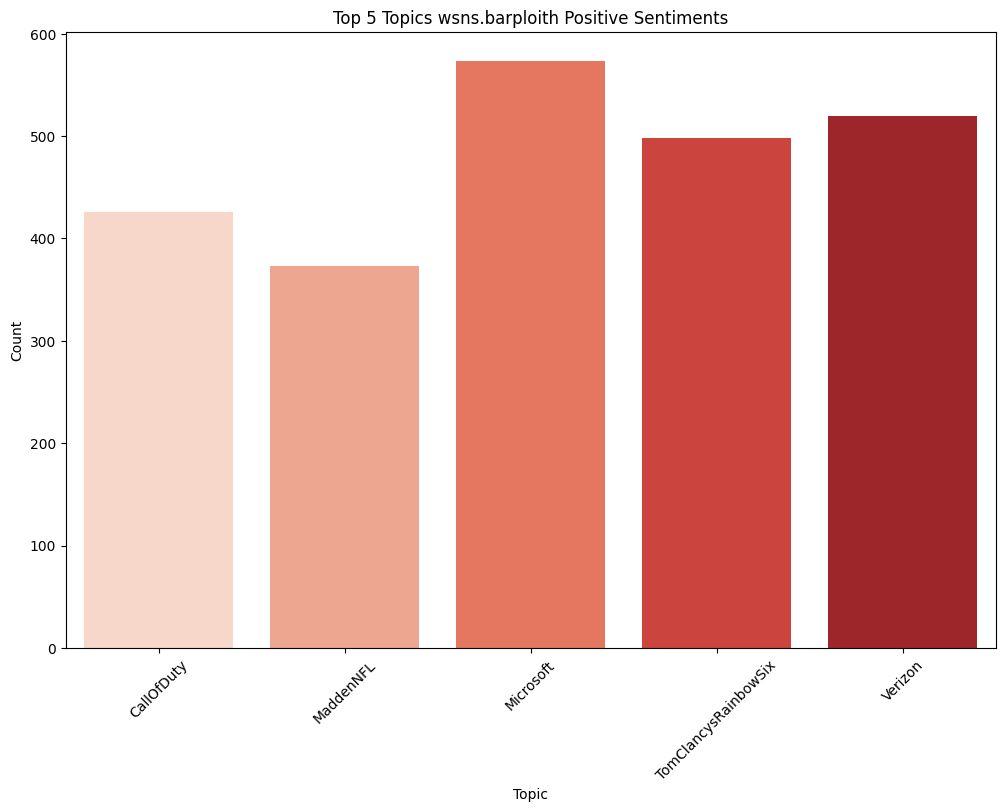

In [45]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', hue='Topic', palette='Reds', legend=False)

plt.title('Top 5 Topics wsns.barploith Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

TOP 5 TOPICS WITH NEUTRAL SENTIMENTS

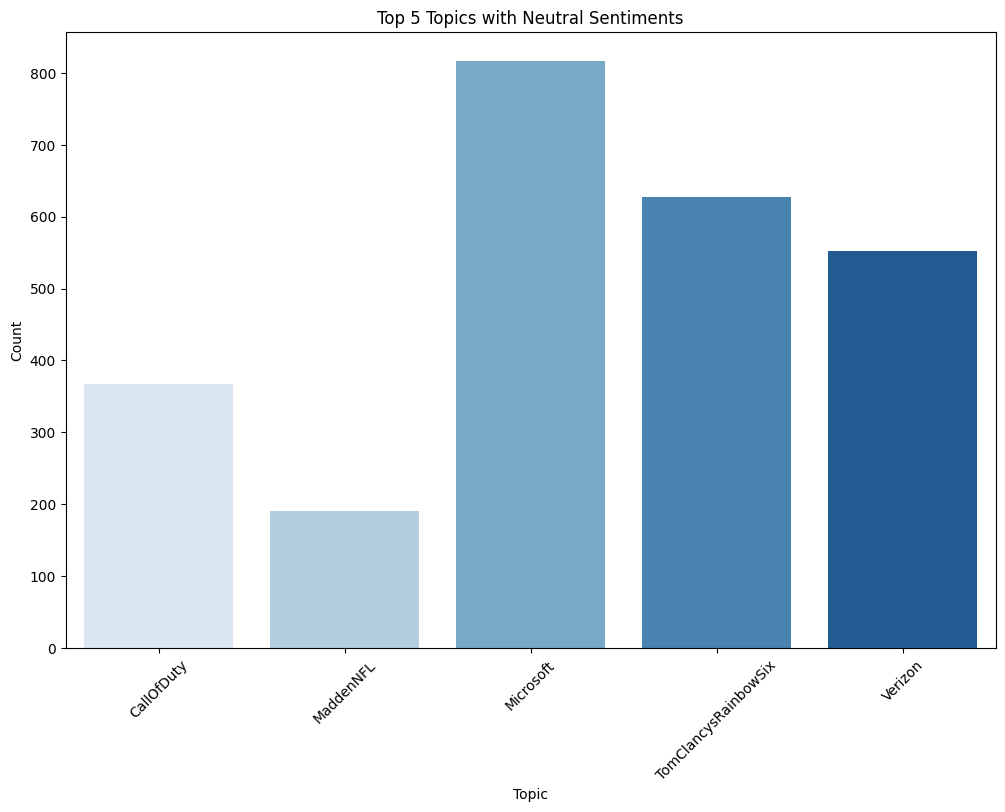

In [48]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', hue='Topic', palette='Blues', legend=False)

plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

TOP 5 TOPICS WITH IRRELEVANT SENTIMENTS

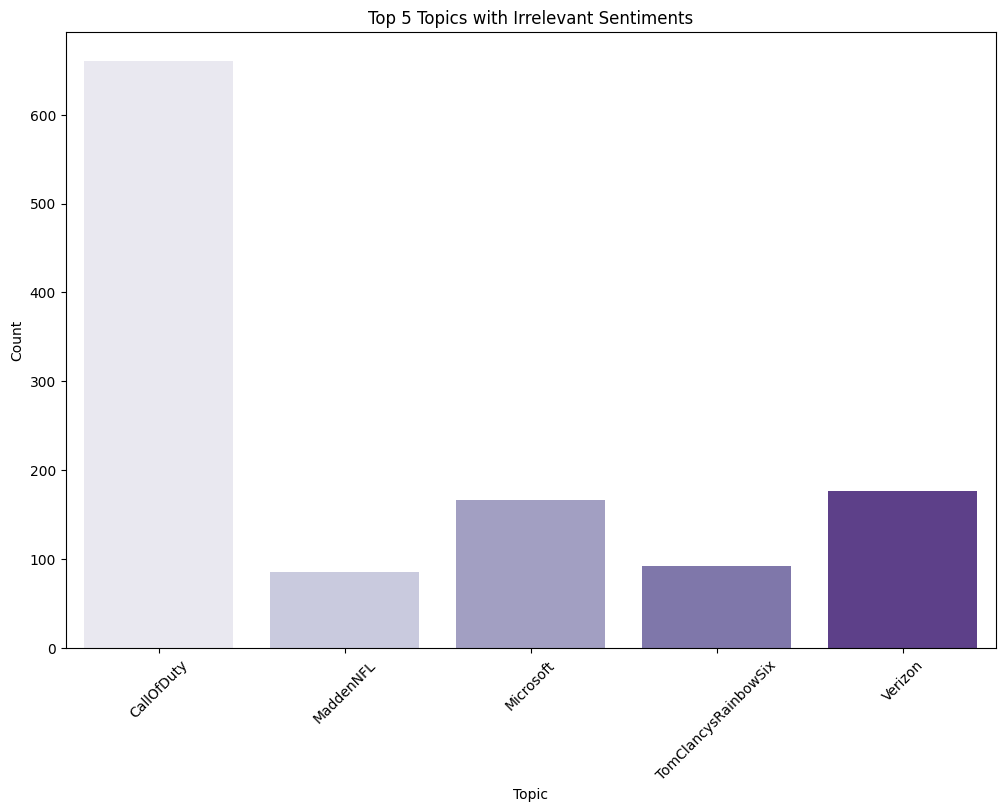

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', hue='Topic', palette='Purples', legend=False)
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

SENTIMENT DISTRIBUTION OF TOPIC GOOGLE

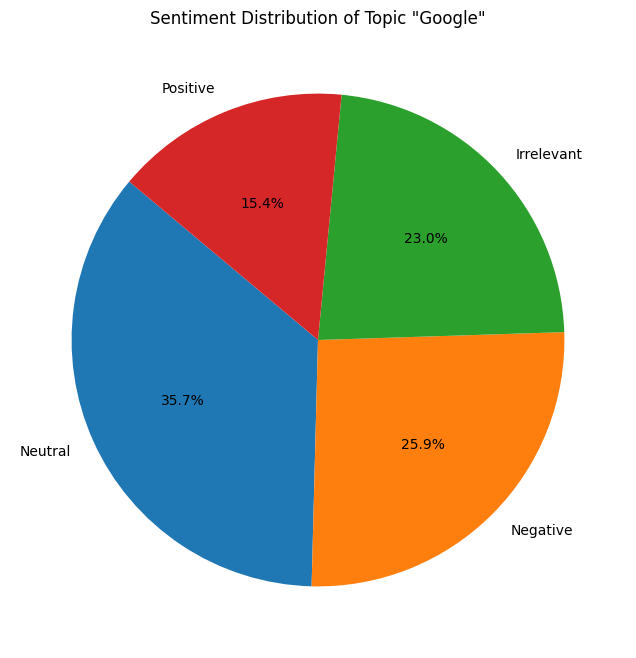

In [53]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = data[data['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

SENTIMENT DISTRIBUTION OF TOPIC MICROSOFT

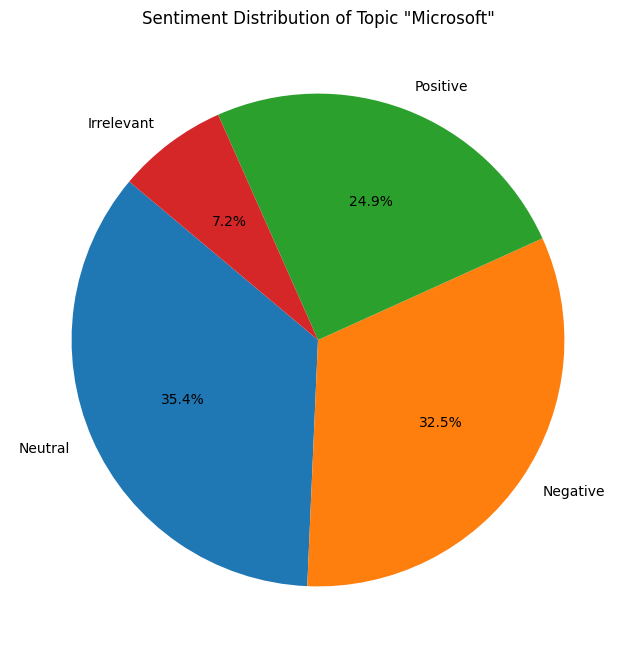

In [54]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = data[data['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()